### Importanto os arquivos

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Lendo o arquivo

In [10]:
turbina = pd.read_csv('T1.csv')
turbina.columns = ['Data/Hora','ActivePower(kW)','WindSpeed(m/s)','CurvaTeorica(kWh)','DirecaoVento']
display(turbina)

,Data/Hora,ActivePower(kW),WindSpeed(m/s),CurvaTeorica(kWh),DirecaoVento
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


### Tratando os dados

In [11]:
del turbina['DirecaoVento']
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'])
display(turbina)

,Data/Hora,ActivePower(kW),WindSpeed(m/s),CurvaTeorica(kWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


### Plotando os dados em um gráfico - Real

<AxesSubplot: xlabel='WindSpeed(m/s)', ylabel='ActivePower(kW)'>

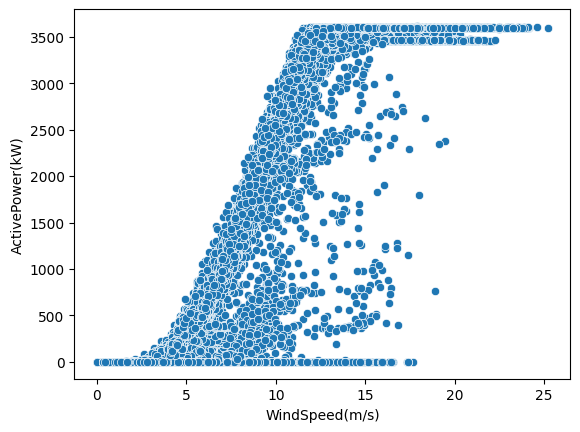

In [13]:
sns.scatterplot(data=turbina, x='WindSpeed(m/s)',y='ActivePower(kW)')

### Plotando os dados em um gráfico - Teórica

<AxesSubplot: xlabel='WindSpeed(m/s)', ylabel='CurvaTeorica(kWh)'>

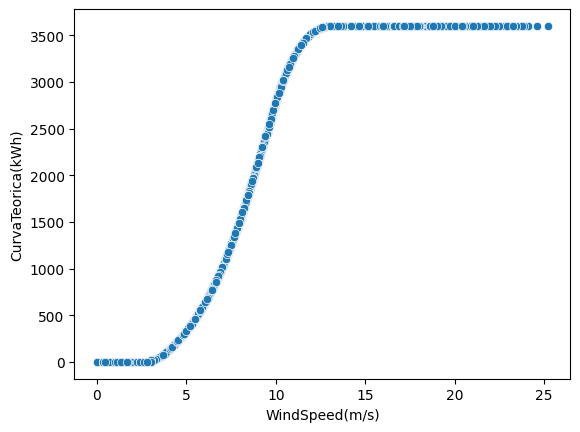

In [14]:
sns.scatterplot(data=turbina, x='WindSpeed(m/s)',y='CurvaTeorica(kWh)')

### Criando "limites aceitáveis"
Vamos atribuir valores aceitáveis para mínimo e máximo de 5% da curva teórica

In [33]:
pot_real = turbina['ActivePower(kW)'].tolist()
pot_teorica = turbina['CurvaTeorica(kWh)'].tolist()
pot_max = []
pot_min = []
dentro_limite = []


for potencia in pot_teorica:
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)
    
for p, potencia in enumerate(pot_real):
    if potencia>=pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')
        

print(dentro_limite.count('Dentro')/len(dentro_limite))    
    

0.37286760340391845


### Adicionando lista "dentro_limite" ao DataFrame

In [34]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/Hora,ActivePower(kW),WindSpeed(m/s),CurvaTeorica(kWh),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


### Plotando novamente o gráfico

<AxesSubplot: xlabel='WindSpeed(m/s)', ylabel='ActivePower(kW)'>

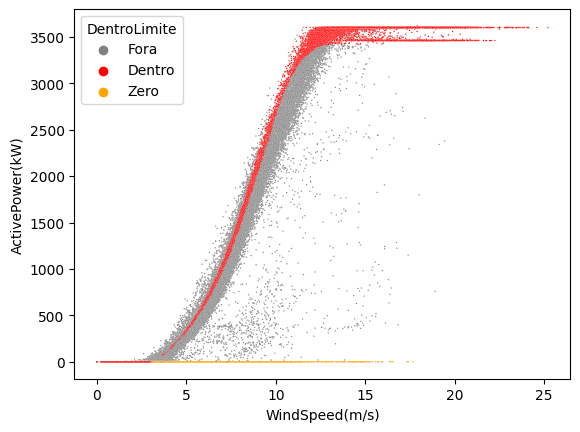

In [35]:
cor = {'Dentro': 'red', 'Fora': 'gray', 'Zero': 'Orange'}
sns.scatterplot(data=turbina, x='WindSpeed(m/s)',y='ActivePower(kW)', hue='DentroLimite', s=1, palette=cor)

### Considerações
As informações aqui apresentadas representam a avaliação de apenas uma única turbina.
Os valores em laranja que estão zerados, podem representar uma possível falha no sensor ou manutenções preventivas no equipamento.